<center>![alt text](https://pandas.pydata.org/_static/pandas_logo.png)</center>

## What problem does pandas solve?


>  Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.


## Highlights
- A fast and efficient DataFrame object for data manipulation with __integrated indexing__;
- Tools for reading and writing data between in-memory data structures and different formats: __CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format__;
- Intelligent data alignment and integrated handling of __missing data__: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible __reshaping and pivoting__ of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures for size mutability;

- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- __High performance merging and joining of data sets__;
- __Hierarchical axis indexing__ provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- __Time series-functionality__: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

[Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

## Installing pandas

<img src="https://upload.wikimedia.org/wikipedia/en/c/cd/Anaconda_Logo.png" alt="Drawing" style="width: 300px;"/>

`> jupyter notebook`

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Using pandas

In [2]:
import pandas as pd

## Series

In [5]:
# Series
pd.Series(data=[1,2,3,4], name="name", index=['a','b','c','s'])

a    1
b    2
c    3
s    4
Name: name, dtype: int64

In [ ]:
ds = pd.Series(data=[1,2,3,4], name='numbers', index=['a','b','c','d'])
ds.name

## DataFrame

In [11]:
# DataFrame
%matplotlib inline

In [8]:
df = pd.DataFrame(data=[[1,2],[3,4]], index=['a','b'], columns=['bala', 'balb'])
df

,bala,balb
a,1,2
b,3,4


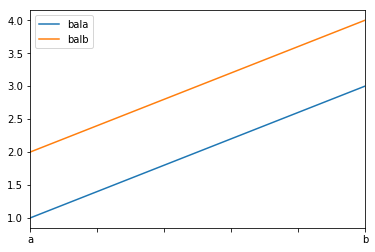

In [12]:
df.plot();
# Add columns, index

### Christmas Beer

In [13]:
!ls *.xlsx

beer tasting_complex.xlsx  disruptive_technologies.xlsx  dt_sensors.xlsx
beer tasting.xlsx	   dt_fridge_sensor_backup.xlsx  dt_sensor_window.xlsx


In [19]:
beerpath = 'beer tasting.xlsx'
df = pd.read_excel(beerpath)
df.T

,Gaute,Joakim,Jonas,Marius,Magne-T,Ole-J,Sebastian,Terje,Thomas,Tor-Arne
1,1,2,3,2,4,3,3,2,2,3
2,1,1,4,4,3,4,4,3,4,2
3,1,2,3,2,4,3,4,1,1,0
4,1,6,4,3,3,4,5,3,4,5
5,1,2,5,4,4,2,5,2,4,4
6,1,5,4,4,2,5,3,4,5,4
7,1,5,5,5,3,6,5,5,4,4


In [18]:
# columns, index, dtypes
df.dtypes

1    int64
2    int64
3    int64
4    int64
5    int64
6    int64
7    int64
dtype: object

In [ ]:
# transpose

In [31]:
# loc, iloc, at
df.at['Gaute', 4]

1

In [47]:
# describe
# mean()
df.loc['Gaute']

1    4
2    1
3    1
4    1
5    1
6    1
7    1
Name: Gaute, dtype: int64

In [54]:
# drop Gaute
df.drop('Gaute', inplace=True)

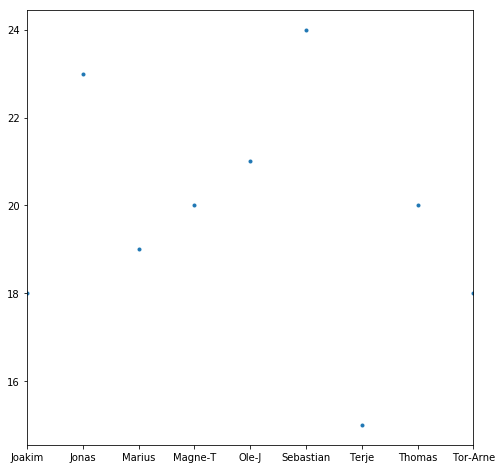

In [59]:
# plot (bar, pie)
df.sum(axis=1).plot(style='.', figsize=(8,8));

#### Who has the most refined taste? (highest spread)

In [64]:
df.T.std().argmax()

'Joakim'

hint: std, max(), argmax()

In [66]:
df[1].value_counts()

3    4
2    4
4    1
Name: 1, dtype: int64

### Apply

In [67]:
df.apply(lambda x: x.min(), axis=1)

Joakim       1
Jonas        3
Marius       2
Magne-T      2
Ole-J        2
Sebastian    3
Terje        1
Thomas       1
Tor-Arne     0
dtype: int64

### Burn the witch!

Who deviates the most from the group?

In [68]:
(df - df.loc['Terje'])

,1,2,3,4,5,6
Joakim,0,-2,1,3,0,1
Jonas,1,1,2,1,3,0
Marius,0,1,1,0,2,0
Magne-T,2,0,3,0,2,-2
Ole-J,1,1,2,1,0,1
Sebastian,1,1,3,2,3,-1
Terje,0,0,0,0,0,0
Thomas,0,1,0,1,2,1
Tor-Arne,1,-1,-1,2,2,0


In [ ]:
df.apply(lambda x: (df-x).mean().mean(), axis=1)

In [ ]:
df.apply(lambda x: (df-x).mean().mean(), axis=1).abs().argmin()